In [1]:
%load_ext autoreload
%autoreload 2

# Ejercicio 1 -   Regresión Lineal Univariada

En este ejercicio, tu objetivo será implementar el método `forward` de un modelo de Regresión Lineal Univariada (es decir, con una sola variable de entrada). No debés implementar ningún otro método.

La función se encuentra en la clase `RegresionLinealUnivariada`.

Luego, ejecuta las pruebas para verificar que implementaste correctamente el modelo.




In [4]:

import numpy as np


class RegresionLinealUnivariada:
    '''
    Esta clase permite entrenar modelos de regresión lineal univariada, cuya función de predicción es:
    y = w x + b
    Los parámetros w y b son números flotantes
    La entrada x debe ser unidimensional.
    '''

    def __init__(self,w:float,b:float):
        self.w=w
        self.b=b
    
    def __repr__(self):
        return f"{self.__class__.__name__}(w = {self.w:.5f}, b = {self.b:.5f})"

    def forward(self,x:np.ndarray):
        '''

        :param x: vector 1D con valores de entrada
        :return: la predicción x*w+b
        '''
        assert (len(x.shape) == 1)

        n=len(x)
        y=np.zeros(n)

        # TODO calcular la salida y en base a: x, self.w, y self.b
        y = self.w*x+self.b

        # FIN TODO
        assert (len(y) == n)

        return y
    
    def backward(self,x:np.ndarray,y:np.ndarray)->(float,float):
        '''
        Calcula las derivadas de los parámetros del modelo con respecto 
        al error cuadrático medio y al conjunto de datos (x,y)
        No necesitas implementar nada aqui
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return derivada del error respecto de w y b
        '''
        
        yhat = self.forward(x)
        # calculo de derivadas
        dEdw = 2 * ((yhat - y) * x).mean()
        dEdb = 2 * (yhat - y).mean()
        return dEdw,dEdb

    def fit(self,x:np.ndarray,y:np.ndarray,lr:float=0.001,epochs:int=100):
        '''
        No necesitas implementar nada aqui
        Entrena el modelo (ajusta los parámetros) para minimizar el error cuadrático medio
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :param lr: velocidad de aprendizaje (learning rate)
        :param epochs: cantidad de iteraciones de aprendizaje
        '''
        
        assert (len(x.shape) == 1)
        assert (len(y.shape) == 1)
        assert ( len(y) == len(x))
        n = len(x)

        for i in range(epochs):
            dEdw,dEdb=self.backward(x,y)
            # actualizo los parámetros
            self.w = self.w - lr * dEdw
            self.b = self.b - lr * dEdb
            print(f"Epoch {i+1}/{epochs} => Error = {self.error(x,y)}")
        
    def error(self,x:np.ndarray,y:np.ndarray)->float:
        '''
        Error cuadrático medio (MSE) del modelo
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return flotante con el error promedio del modelo entre todos los ejemplos
        '''
        
        yhat = self.forward(x)
        d2 = (y-yhat)**2
        return d2.mean()
    

# Ejecuta el siguiente bloque para verificar que la función `forward` está bien implementada

In [5]:
import utils

rl1=RegresionLinealUnivariada(0.0,0.0)
x=np.array([1.0,2.0,3.0])
y=rl1.forward(x)
utils.verificar_igualdad(y,np.zeros(3))



rl2=RegresionLinealUnivariada(1.0,0.0)
y=rl2.forward(x)
utils.verificar_igualdad(y,x)

rl3=RegresionLinealUnivariada(0.0,1.0)
y=rl3.forward(x)
utils.verificar_igualdad(y,np.ones(3))


rl4=RegresionLinealUnivariada(1.0,1.0)
y=rl4.forward(x)
utils.verificar_igualdad(y,np.ones(3)+x)


Los vectores x e y son iguales:
x:  [0. 0. 0.]
y:  [0. 0. 0.]
Los vectores x e y son iguales:
x:  [1. 2. 3.]
y:  [1. 2. 3.]
Los vectores x e y son iguales:
x:  [1. 1. 1.]
y:  [1. 1. 1.]
Los vectores x e y son iguales:
x:  [2. 3. 4.]
y:  [2. 3. 4.]


# Verifica que el modelo se entrena correctamente.

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados
Epoch 1/100 => Error = 2.617221208839774
Epoch 2/100 => Error = 2.583193473334263
Epoch 3/100 => Error = 2.58172523555663
Epoch 4/100 => Error = 2.580452487586971
Epoch 5/100 => Error = 2.579182211217815
Epoch 6/100 => Error = 2.5779132539522074
Epoch 7/100 => Error = 2.5766456075693123
Epoch 8/100 => Error = 2.5753792706740777
Epoch 9/100 => Error = 2.5741142419135485
Epoch 10/100 => Error = 2.572850519936412
Epoch 11/100 => Error = 2.5715881033927532
Epoch 12/100 => Error = 2.570326990934049
Epoch 13/100 => Error = 2.5690671812131716
Epoch 14/100 => Error = 2.567808672884383
Epoch 15/100 => Error = 2.5665514646033363
Epoch 16/100 => Error = 2.5652955550270735
Epoch 17/100 => Error = 2.564040942814024
Epoch 18/100 => Error = 2.5627876266240026
Epoch 19/100 => Error = 2.5615356051182077
Epoch 20/100 => Error = 2.560284876959224
Epoch 21/100 => Error = 2.559035440811012
Epoch 22/100 => Error = 

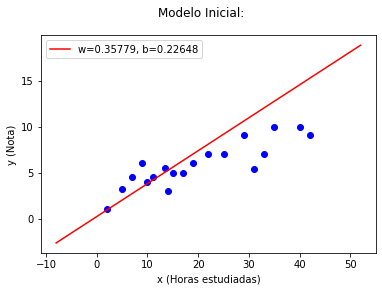

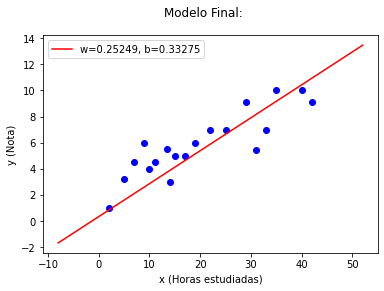

In [6]:
# Carga del dataset
import os
dataset_path=os.path.join("study_regression_small.csv")


data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]

print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
w_random=np.random.rand()
b_random=np.random.rand()
rl=RegresionLinealUnivariada(w_random,b_random)

# visualiza el modelo inicial aleatorio y los datos
utils.plot_regresion_lineal_univariada(rl.w,rl.b,x,y,title="Modelo Inicial: ")

# entrena el modelo
rl.fit(x,y,lr=0.001,epochs=100)

#visualiza el modelo entrenado
utils.plot_regresion_lineal_univariada(rl.w,rl.b,x,y,title="Modelo Final: ")
